In [ ]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import os,glob
import string
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
import time

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The class for each graph node that stores the hub and authority scores as its children and parent nodes
class Node:
    def __init__(self, index,children,parents):
        self.index = index
        self.children = children
        self.parents =parents
        self.auth = 1.0
        self.hub = 1.0

In [ ]:
#Reading the dataset
web_graph = nx.read_gpickle("/content/drive/MyDrive/web_graph.gpickle")
web_graph

Sports: Giddy Phelps Touches Gold for First Time Michael Phelps won the gold medal in the 400 individual medley and set a world record in a time of 4 minutes 8.26 seconds.



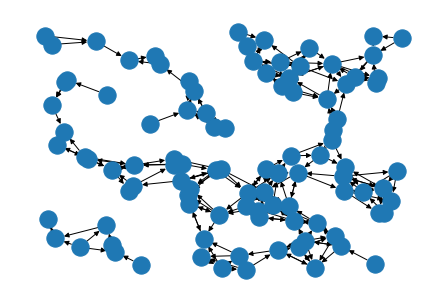

In [ ]:
#get the 50th page content
node_index = 50
print(web_graph.nodes[node_index]['page_content'])

pos = {i: web_graph.nodes[i]['pos'] for i in range(len(web_graph.nodes))}
nx.draw(web_graph, pos)

print()

In [ ]:

#Function to get the root set
def get_root(query):
  root_set=[]
  query_terms=word_tokenize(query)
  query_terms=[query.lower() for query in query_terms]

  #checking if every term of the query is in the particular node after tokenization
  for i in range(len(web_graph.nodes)):
    text=web_graph.nodes[i]['page_content']
    words=word_tokenize(text)
    words=[word.lower() for word in words]
    flag=0
    for query in query_terms:
      if query not in words:
        flag=1
        break
    if flag==0:
      root_set.append(i)
  return root_set

    #if query in words:
    #  root_set.append(i)



In [ ]:
#Function to get the index of the parents of given node
def get_parents(index):
  parents=[]
  for i in range(len(web_graph.nodes)):
    if index in web_graph.adj[i]:
        parents.append(i)
  return parents

#base_set=list(set(base_set))


In [ ]:

print(get_parents(50))
print(list(web_graph[21]))
print(list(web_graph.adj[21]))

[21, 40, 55]
[50, 73, 76]
[50, 73, 76]


In [ ]:

#Making the Nodes for the root set
def classroot(root_set,node_set,base_set):
  for i in root_set:
    base_set.append(i)
    child_set=list(web_graph[i])
    parent_set=get_parents(i)
    #print(child_set)
    #print(parent_set)
    node_set.append(Node(i,child_set,parent_set))
    base_set.extend(parent_set)
    base_set.extend(child_set)
  base_set=list(set(base_set))
  return base_set,node_set

#base_set=list(set(base_set))
#print(base_set)

In [ ]:
#Function to make the Nodes for the base set, excluding the root set which has already been made
def make_base_nodes(root_set,base_set,node_set):
  for i in base_set:
    if i not in root_set:
      child_set=list(web_graph[i])
      children_set=list(set(child_set) & set(base_set))
      parent_set=get_parents(i)
      parent_set=list(set(parent_set) & set(base_set))
      node_set.append(Node(i,child_set,parent_set))
  return node_set

In [ ]:
#function to update authority scores of every node in base set
def update_auth(self):
  count=0.0
  for i in self.parents:
    for node in node_set:
      if node.index==i:
        count=count+node.hub
  self.auth = count

#function to update hub scores of every node in base set
def update_hub(self):
  count=0.0
  for i in self.children:
    for node in node_set:
      if node.index==i:
        count=count+node.auth
  self.hub = count

#Normalising the hub and authority of every node in the base set
def normalize_auth_hub(self,node_set):
  auth_sum = sum(node.auth for node in node_set)
  hub_sum = sum(node.hub for node in node_set)

  for node in node_set:
    node.auth /= auth_sum
    node.hub /= hub_sum

#Implementing 1 iteration of the HITS Algorithm
def HITS(node_set):
    for node in node_set:
        update_auth(node)
    for node in node_set:
        update_hub(node)
    normalize_auth_hub(node,node_set)

In [ ]:
#Getting the query

query=input()
start_time=time.time()
root_set=get_root(query)

#Initializing root and base sets
base_set=[]
node_set=[]

classroot(root_set,node_set,base_set)
node_set=make_base_nodes(root_set,base_set,node_set)
base_set=list(set(base_set))
print("Root set:")
print(root_set)
print("Root set lenth:",len(root_set))
print("Base set:")
print(base_set)
print("Base set length:",len(base_set))
epochs=500
for i in range(epochs):
  HITS(node_set)

#for node in node_set:
#  print(node.index)
#  print(node.auth)
#  print(node.hub)

#Sorting the nodes based on hub and authority scores in descending order
hub_scores=sorted(node_set,key=lambda x:x.hub,reverse=True)
auth_scores=sorted(node_set,key=lambda x:x.auth,reverse=True)

time_taken=time.time()-start_time
print("Time taken=",time_taken)
print("Top 10 hub and auth index scores:")
for i in range(len(hub_scores)):
  if i>10:
    break
  print("The value of i for ith hub/authority:",i)
  print(hub_scores[i].index,hub_scores[i].hub)
  print(auth_scores[i].index,auth_scores[i].auth)

gunfire
Root set:
[77]
Root set lenth: 1
Base set:
[8, 66, 77, 15]
Base set length: 4
Time taken= 0.051998138427734375
Top 10 hub and auth index scores:
The value of i for ith hub/authority: 0
15 0.2553326896159793
66 0.24635721969537652
The value of i for ith hub/authority: 1
15 0.2553326896159793
66 0.24635721969537652
The value of i for ith hub/authority: 2
77 0.24591137970668758
8 0.2066600943746112
The value of i for ith hub/authority: 3
8 0.14533005273830776
77 0.16628333019210875
The value of i for ith hub/authority: 4
66 0.04904659416152306
15 0.06717106802126352
The value of i for ith hub/authority: 5
66 0.04904659416152306
15 0.06717106802126352


Text(0, 0.5, 'Time taken')

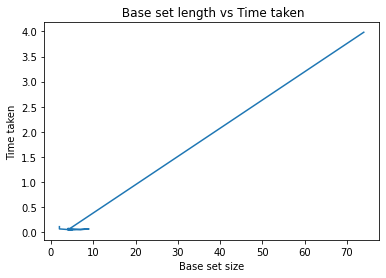

In [ ]:
time=[3.983381986618042 ,0.046587228775024414,0.04710531234741211,0.06584978103637695,0.052773475646972656,0.07538628578186035,0.04832911491394043,0.06635832786560059,0.1115255355834961]
nodes=[74,4,5,9,7,4,5,2,2]
plt.plot(nodes,time)
plt.title(" Base set length vs Time taken")
plt.xlabel("Base set size")
plt.ylabel("Time taken")